In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score, 
                             roc_auc_score, 
                             roc_curve)
import optuna

In [2]:
project_root = Path.cwd().parent
data_dir = project_root / 'data' / 'processed'
data_dir

PosixPath('/Users/david.palacio/Documents/academia/data-projects-lab/projects/clasificador-meli/src/data/processed')

In [3]:
df = pd.read_parquet(data_dir / 'data_model.parquet')
df.head()

,initial_quantity,listing_type_id,price,seller_city,base_price,available_quantity,week_day,sold_quantity,seller_state,garantia_aplica,...,tarjeta_de_credito,dragged_bids_and_visits,transferencia_bancaria,shipping_local_pick_up,efectivo,automatic_relist,days_active,acordar_con_el_comprador,shipping_free_shipping,condition
0,1,0,80.0,2043,80.0,1,2,0.0,1,1,...,False,1.0,True,True,True,False,60,True,False,0
1,1,6,2650.0,380,2650.0,1,2,0.0,1,1,...,False,0.0,True,True,True,False,60,False,False,1
2,1,0,60.0,344,60.0,1,6,0.0,1,1,...,True,1.0,True,True,True,False,60,False,False,1
3,1,6,580.0,946,580.0,1,4,0.0,1,1,...,True,0.0,True,True,True,False,66,False,False,0
4,1,0,30.0,2261,30.0,1,4,0.0,0,1,...,False,1.0,True,True,True,False,60,True,False,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   initial_quantity          100000 non-null  int64  
 1   listing_type_id           100000 non-null  int64  
 2   price                     100000 non-null  float64
 3   seller_city               100000 non-null  int64  
 4   base_price                100000 non-null  float64
 5   available_quantity        100000 non-null  int64  
 6   week_day                  100000 non-null  int64  
 7   sold_quantity             100000 non-null  float64
 8   seller_state              100000 non-null  int64  
 9   garantia_aplica           100000 non-null  int64  
 10  shipping_mode             100000 non-null  int64  
 11  month_start               100000 non-null  int64  
 12  month_stop                100000 non-null  int64  
 13  tarjeta_de_credito        100000 non-null  bo

In [5]:
X = df.drop(columns=['condition'], axis=1)
y = df['condition']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
params_xg_model = {
                'n_estimators': 800,
                'max_depth' : 15,                         
                'objective' : 'binary:logistic',         
                'reg_lambda' : 10,                       
                'gamma' : 0.3,                           
                'alpha' : 1,                             
                'learning_rate' : 0.10,                   
                'colsample_bytree' : 0.7,                 
                'scale_pos_weight' : 1,                  
                'subsample' : 0.1,                       
                'min_child_weight' : 3,                  
                'missing' : np.nan,                      
                'num_parallel_tree' : 2,                 
                'importance_type' : 'weight',
                'eval_metric' : 'auc',
                'verbosity' : 1,
                'nthread' : -1,                          
                'tree_method' : 'auto', # auto 
}

In [8]:
# train the model
model = xgb.XGBClassifier(**params_xg_model)

In [9]:
# - X_train, Y_train: datos de entrenamiento
# - Y_train.values.ravel(): convierte la Serie de pandas a array 1D (requerido por XGBoost)
# - eval_set: conjunto de validación para monitorear métricas durante el entrenamiento
# - verbose=True: muestra el progreso del entrenamiento por cada iteración
model.fit(
    X_train,
    Y_train.values.ravel(),
    eval_set=[(X_test, Y_test.values.ravel())],
    verbose=True
)

[0]	validation_0-auc:0.89471
[1]	validation_0-auc:0.89797
[2]	validation_0-auc:0.89521
[3]	validation_0-auc:0.90301
[4]	validation_0-auc:0.90570
[5]	validation_0-auc:0.90676
[6]	validation_0-auc:0.90708
[7]	validation_0-auc:0.90875
[8]	validation_0-auc:0.91001
[9]	validation_0-auc:0.91072
[10]	validation_0-auc:0.91077
[11]	validation_0-auc:0.91086
[12]	validation_0-auc:0.91135
[13]	validation_0-auc:0.91141
[14]	validation_0-auc:0.91266
[15]	validation_0-auc:0.91329
[16]	validation_0-auc:0.91427
[17]	validation_0-auc:0.91456
[18]	validation_0-auc:0.91475
[19]	validation_0-auc:0.91496
[20]	validation_0-auc:0.91519
[21]	validation_0-auc:0.91536
[22]	validation_0-auc:0.91555
[23]	validation_0-auc:0.91586
[24]	validation_0-auc:0.91611
[25]	validation_0-auc:0.91636
[26]	validation_0-auc:0.91653
[27]	validation_0-auc:0.91712
[28]	validation_0-auc:0.91738
[29]	validation_0-auc:0.91780
[30]	validation_0-auc:0.91810
[31]	validation_0-auc:0.91830
[32]	validation_0-auc:0.91876
[33]	validation_0-au

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.3, grow_policy=None, importance_type='weight',
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None, nthread=-1, ...)

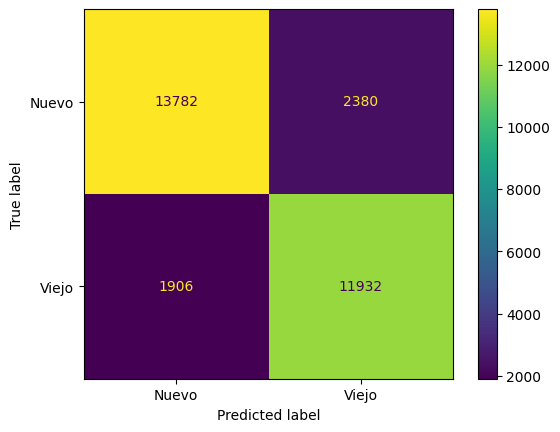

In [10]:
from sklearn import metrics

y_pred = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Nuevo', 'Viejo'])

cm_display.plot()
plt.show()

In [11]:
metrics_data = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Valor': [
        accuracy_score(Y_test, y_pred),
        precision_score(Y_test, y_pred),
        recall_score(Y_test, y_pred),
        f1_score(Y_test, y_pred),
        roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
    ],
    'Interpretación': [
        'Porcentaje de predicciones correctas',
        'De los predichos como positivos, cuántos son correctos',
        'De los positivos reales, cuántos detectamos',
        'Balance entre Precision y Recall',
        'Capacidad de discriminación del modelo'
    ]
}

df_metrics = pd.DataFrame(metrics_data)
df_metrics['Valor'] = df_metrics['Valor'].round(4)
print(df_metrics.to_string(index=False))

  Métrica  Valor                                         Interpretación
 Accuracy 0.8571                   Porcentaje de predicciones correctas
Precision 0.8337 De los predichos como positivos, cuántos son correctos
   Recall 0.8623            De los positivos reales, cuántos detectamos
 F1-Score 0.8477                       Balance entre Precision y Recall
  ROC-AUC 0.9355                 Capacidad de discriminación del modelo


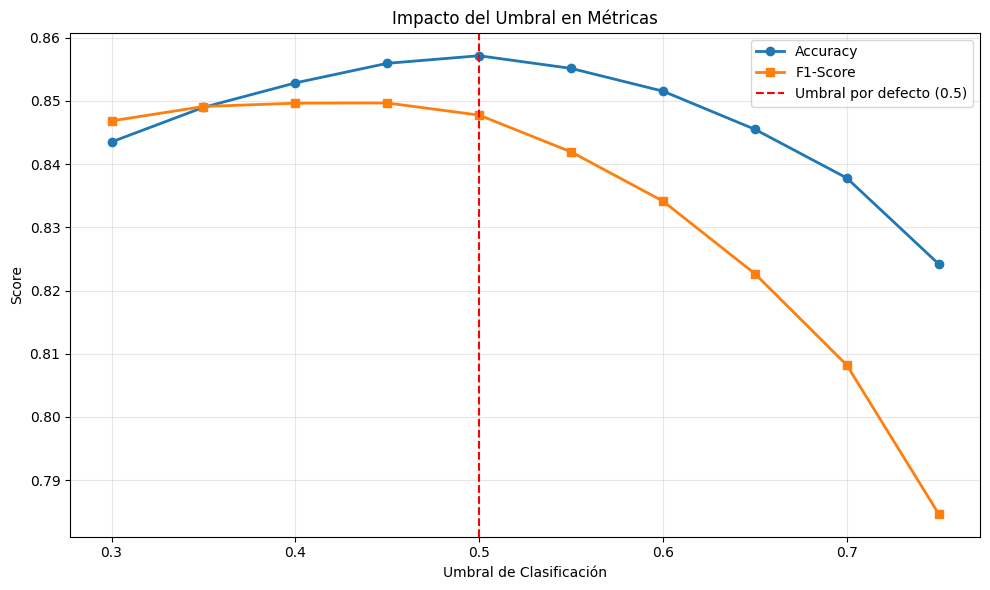


Mejor umbral para Accuracy: 0.50 (Accuracy: 0.8571)
Mejor umbral para F1-Score: 0.45 (F1: 0.8497)


In [12]:
# Obtener probabilidades
y_proba = model.predict_proba(X_test)[:, 1]

# Probar diferentes umbrales
thresholds = np.arange(0.3, 0.8, 0.05)
accuracies = []
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    accuracies.append(accuracy_score(Y_test, y_pred_threshold))
    f1_scores.append(f1_score(Y_test, y_pred_threshold))

# Visualizar
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(thresholds, accuracies, marker='o', label='Accuracy', linewidth=2)
ax.plot(thresholds, f1_scores, marker='s', label='F1-Score', linewidth=2)
ax.axvline(x=0.5, color='red', linestyle='--', label='Umbral por defecto (0.5)')
ax.set_xlabel('Umbral de Clasificación')
ax.set_ylabel('Score')
ax.set_title('Impacto del Umbral en Métricas')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Mejor umbral según cada métrica
best_acc_threshold = thresholds[np.argmax(accuracies)]
best_f1_threshold = thresholds[np.argmax(f1_scores)]

print(f"\nMejor umbral para Accuracy: {best_acc_threshold:.2f} (Accuracy: {max(accuracies):.4f})")
print(f"Mejor umbral para F1-Score: {best_f1_threshold:.2f} (F1: {max(f1_scores):.4f})")

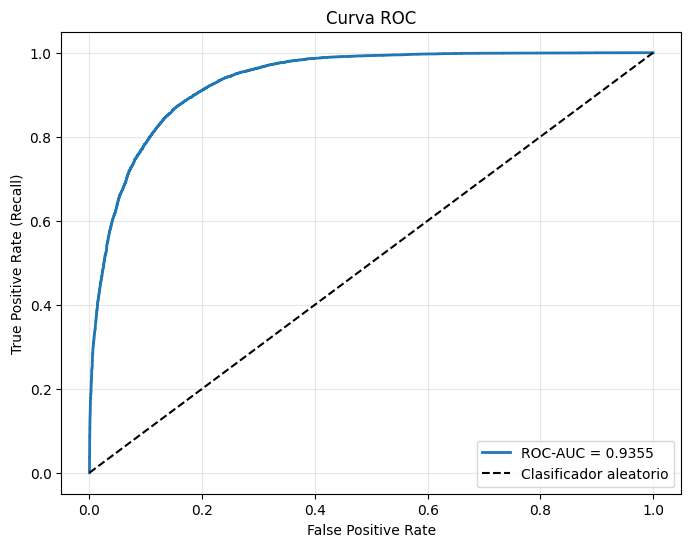

In [13]:
# Obtener curva ROC
y_proba = model.predict_proba(X_test)[:, 1] # probabilidad de clase positiva
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)

# tpr -> de todos los positivos reales, cuántos detectamos...  TPR = TP / (TP + FN)
# fpr -> de todos los negativos reales, cuántos clasificamos mla como positivos... FPR = FP / (FP + TN)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC-AUC = {roc_auc_score(Y_test, y_proba):.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
# El modelo NO cambia. Solo cambia cómo INTERPRETAMOS las probabilidades.

# PASO 1: El modelo entrenado da probabilidades
y_proba = model.predict_proba(X_test)[:, 1]
# Ejemplo: [0.2, 0.7, 0.4, 0.9, 0.3]

# PASO 2: Decidir el umbral para convertir probabilidad → predicción
# Umbral = 0.5 (por defecto)
y_pred = (y_proba >= 0.5).astype(int)
# [0.2, 0.7, 0.4, 0.9, 0.3] → [0, 1, 0, 1, 0]

# Umbral = 0.3 (más permisivo)
y_pred = (y_proba >= 0.3).astype(int)
# [0.2, 0.7, 0.4, 0.9, 0.3] → [0, 1, 1, 1, 1]  ← Predice más "usados"

# Umbral = 0.8 (más estricto)
y_pred = (y_proba >= 0.8).astype(int)
# [0.2, 0.7, 0.4, 0.9, 0.3] → [0, 0, 0, 1, 0]  ← Predice menos "usados"

# La curva ROC:

# Para CADA umbral posible, calcula:
# - TPR (cuántos positivos detectamos)
# - FPR (cuántos negativos clasificamos mal)
# Y grafica todos esos puntos

# Umbral bajo (0.2): predice muchos como "usado"
# → TPR alto (detecta casi todos los usados)
# → FPR alto (clasifica muchos nuevos como usados por error)

# Umbral alto (0.8): predice pocos como "usado"
# → TPR bajo (detecta pocos usados)
# → FPR bajo (casi no clasifica nuevos como usados por error)

In [15]:
# Código simple para demostrar
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 1, 0, 1]
y_proba = [0.2, 0.7, 0.4, 0.9, 0.3]

print("Umbral | TP | FP | TPR  | FPR")
print("-" * 40)

for threshold in [0.3, 0.5, 0.7]:
    y_pred = (np.array(y_proba) >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    print(f"{threshold:.1f}    | {tp}  | {fp}  | {tpr:.2f} | {fpr:.2f}")

Umbral | TP | FP | TPR  | FPR
----------------------------------------
0.3    | 3  | 1  | 1.00 | 0.50
0.5    | 1  | 1  | 0.33 | 0.50
0.7    | 1  | 1  | 0.33 | 0.50


La curva ROC NO entrena el modelo múltiples veces. Solo prueba diferentes umbrales de decisión sobre las MISMAS probabilidades que el modelo ya calculó. Es como mover una línea imaginaria que separa 'nuevo' de 'usado'.

In [16]:
def objective(trial):
    # Definir hiperparámetros a probar
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'random_state': 42
    }

    # Entrenar modelo con estos parámetros
    model = xgb.XGBClassifier(**params)
    model.fit(X_train, Y_train, verbose=False)

    # Evaluar en test
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)

    return accuracy

# Ejecutar optimización
print("Iniciando búsqueda de hiperparámetros...")
study = optuna.create_study(direction='maximize')  # Maximizar accuracy
study.optimize(objective, n_trials=20)  # 20 combinaciones

# Mejores parámetros
print("\n" + "="*50)
print("Mejores hiperparámetros encontrados:")
print("="*50)
for key, value in study.best_params.items():
    print(f"{key}: {value}")

print(f"\nMejor Accuracy: {study.best_value:.4f}")

# Entrenar modelo final con mejores parámetros
best_model = xgb.XGBClassifier(**study.best_params, random_state=42)
best_model.fit(X_train, Y_train)
y_pred_best = best_model.predict(X_test)

print(f"Accuracy modelo optimizado: {accuracy_score(Y_test, y_pred_best):.4f}")

[I 2025-10-26 10:18:52,609] A new study created in memory with name: no-name-1c893f06-f662-4c76-9ead-932ae8d08a07


Iniciando búsqueda de hiperparámetros...


[I 2025-10-26 10:18:53,086] Trial 0 finished with value: 0.8609333333333333 and parameters: {'max_depth': 9, 'learning_rate': 0.17070256849067827, 'n_estimators': 135, 'min_child_weight': 6}. Best is trial 0 with value: 0.8609333333333333.
[I 2025-10-26 10:18:54,065] Trial 1 finished with value: 0.8654333333333334 and parameters: {'max_depth': 10, 'learning_rate': 0.14794848306075847, 'n_estimators': 254, 'min_child_weight': 1}. Best is trial 1 with value: 0.8654333333333334.
[I 2025-10-26 10:18:54,940] Trial 2 finished with value: 0.8628666666666667 and parameters: {'max_depth': 10, 'learning_rate': 0.21088263239647154, 'n_estimators': 241, 'min_child_weight': 7}. Best is trial 1 with value: 0.8654333333333334.
[I 2025-10-26 10:18:55,903] Trial 3 finished with value: 0.8641666666666666 and parameters: {'max_depth': 10, 'learning_rate': 0.14005459198956685, 'n_estimators': 262, 'min_child_weight': 4}. Best is trial 1 with value: 0.8654333333333334.
[I 2025-10-26 10:18:56,141] Trial 4 f


Mejores hiperparámetros encontrados:
max_depth: 10
learning_rate: 0.14794848306075847
n_estimators: 254
min_child_weight: 1

Mejor Accuracy: 0.8654
Accuracy modelo optimizado: 0.8654


In [17]:
import json

# Guardar mejores hiperparámetros
models_dir = Path('../../models')
models_dir.mkdir(exist_ok=True)

# Guardar config
config_file = models_dir / 'best_xgb_config.json'
with open(config_file, 'w') as f:
    json.dump({
        'hyperparameters': study.best_params,
        'best_score': float(study.best_value),
        'n_trials': len(study.trials),
        'timestamp': pd.Timestamp.now().isoformat()
    }, f, indent=2)

print(f"Hiperparámetros guardados en: {config_file}")

Hiperparámetros guardados en: ../../models/best_xgb_config.json
